<a href="https://colab.research.google.com/github/nurkausarmuner-enka/dl-assignment-01-numpy-neural-network/blob/main/C_two_layer_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Muner Nurkaussar
# C. NumPy
import numpy as np

In [15]:
# dataset
X = np.array([
    [20, 3, 4],
    [15, 5, 3],
    [30, 2, 2],
    [25, 4, 1],
    [35, 2, 3]
])

Y = np.array([
    [18],
    [20],
    [22],
    [25],
    [30]
])

In [16]:
np.random.seed(42)  # for reproducibility

W1 = np.random.randn(3, 3) * 0.01
b1 = np.zeros((3, 1))

W2 = np.random.randn(1, 3) * 0.01
b2 = np.zeros((1, 1))

In [17]:
#functions
def relu(z):
    return np.maximum(0, z)

In [18]:
def relu_derivative(z):
    return (z > 0).astype(float)

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [20]:
def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

In [21]:
# training
learning_rate = 0.001
epochs = 1000
losses = []

In [22]:
for epoch in range(epochs):

    # forward prop
    Z1 = np.dot(W1, X.T) + b1        # (3,5)
    A1 = relu(Z1)

    Z2 = np.dot(W2, A1) + b2         # (1,5)
    A2 = sigmoid(Z2)

    # loss
    loss = np.mean((A2.T - Y) ** 2)
    losses.append(loss)

    # back prop
    dA2 = 2 * (A2 - Y.T)
    dZ2 = dA2 * sigmoid_derivative(Z2)

    dW2 = np.dot(dZ2, A1.T) / X.shape[0]
    db2 = np.mean(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)

    dW1 = np.dot(dZ1, X) / X.shape[0]
    db1 = np.mean(dZ1, axis=1, keepdims=True)

    # update
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2


In [23]:
print("Final W1:\n", W1)
print("Final b1:\n", b1)
print("Final W2:\n", W2)
print("Final b2:\n", b2)

Final W1:
 [[0.38380855 0.07124178 0.058118  ]
 [0.35339593 0.06314482 0.04411335]
 [0.40574367 0.08316284 0.04885979]]
Final b1:
 [[0.0184045 ]
 [0.0165216 ]
 [0.01904791]]
Final W2:
 [[0.39504276 0.36193484 0.41730653]]
Final b2:
 [[0.19360346]]


In [24]:
# predictions
Z1 = np.dot(W1, X.T) + b1
A1 = relu(Z1)
Z2 = np.dot(W2, A1) + b2
predictions = sigmoid(Z2)

print("Predictions:")
print(predictions.T)

Predictions:
[[0.99993786]
 [0.99947624]
 [0.99999914]
 [0.99999278]
 [0.99999991]]


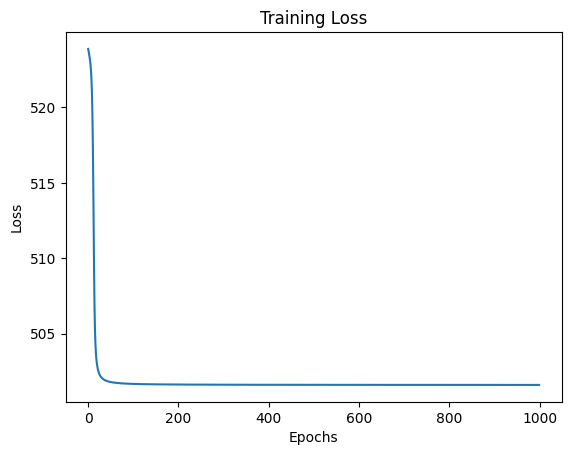

In [25]:
# plot
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()